In [1]:

import pandas as pd 

# Importing the dataset
hypertension = pd.read_csv('hypertension_data.csv')

hypertension.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
features = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'thal']
label = 'target'
X, y = hypertension[features].values, hypertension[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [57.0, 3.0, 145.0, 233.0, 1.0, 150.0, 0.0, 2.3, 1.0] 
  Label: 1
Patient 2 
  Features: [64.0, 2.0, 130.0, 250.0, 0.0, 187.0, 0.0, 3.5, 2.0] 
  Label: 1
Patient 3 
  Features: [52.0, 1.0, 130.0, 204.0, 0.0, 172.0, 0.0, 1.4, 2.0] 
  Label: 1
Patient 4 
  Features: [56.0, 1.0, 120.0, 236.0, 0.0, 178.0, 0.0, 0.8, 2.0] 
  Label: 1


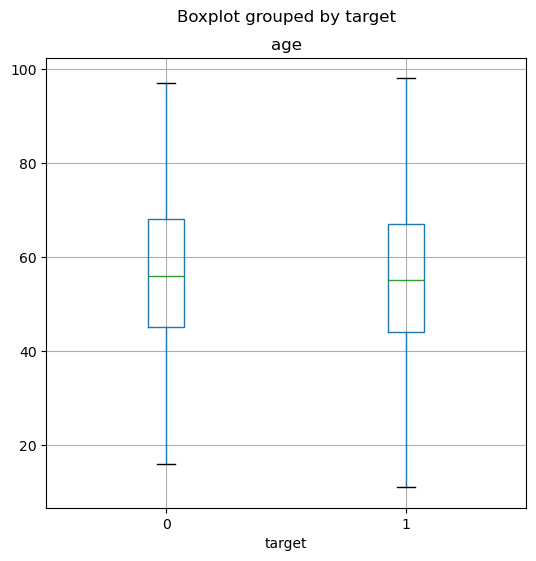

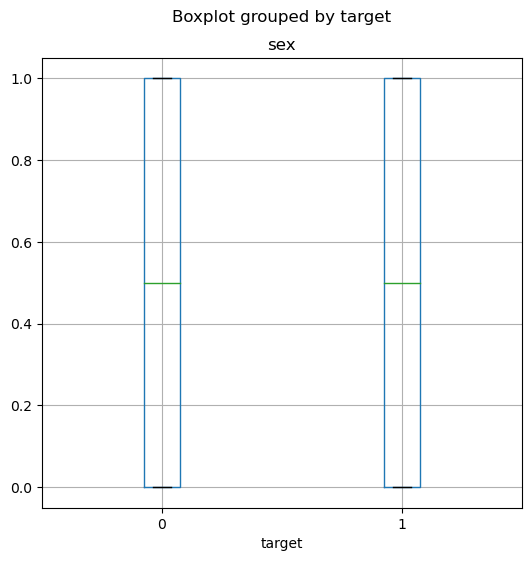

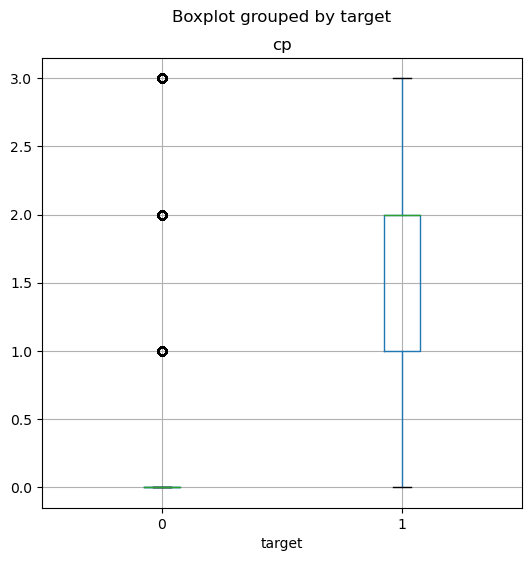

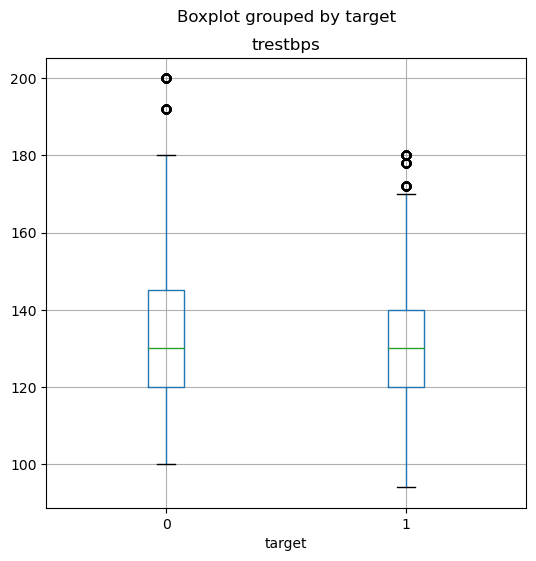

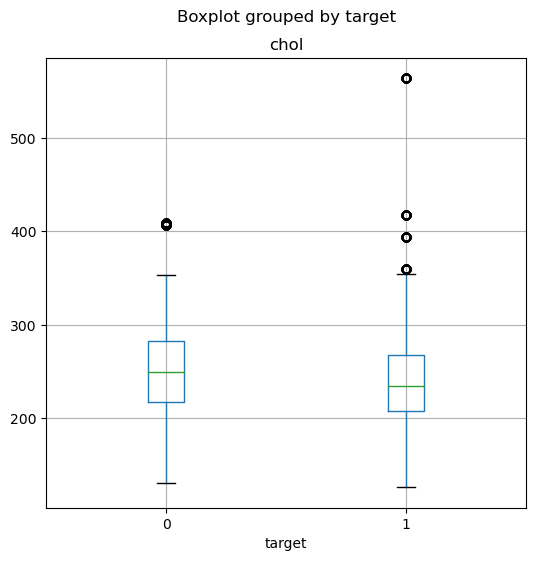

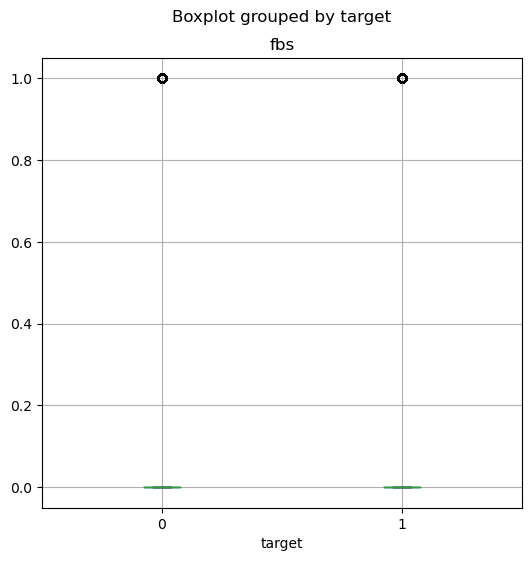

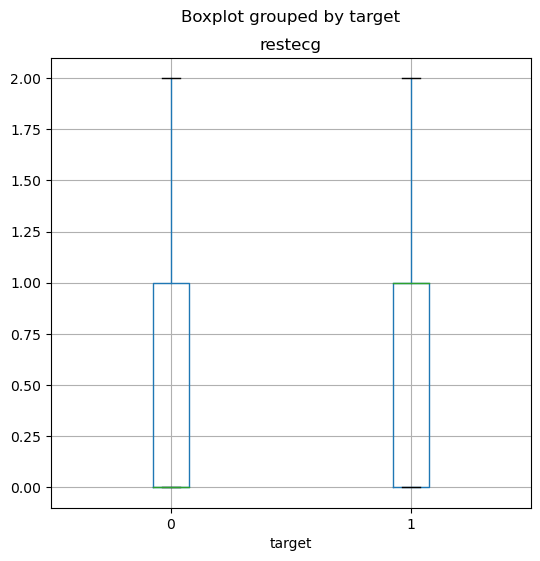

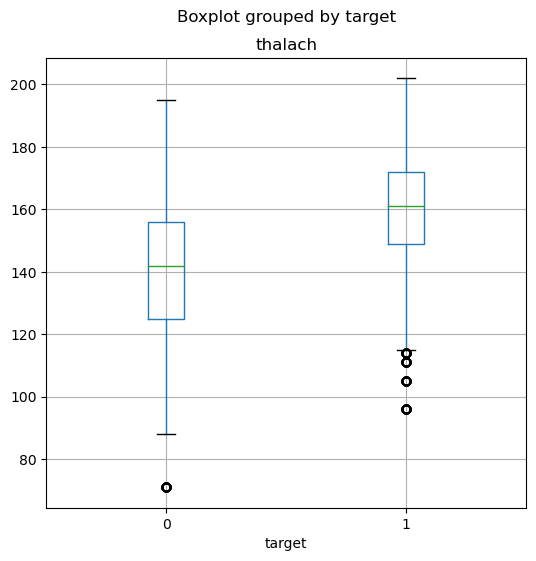

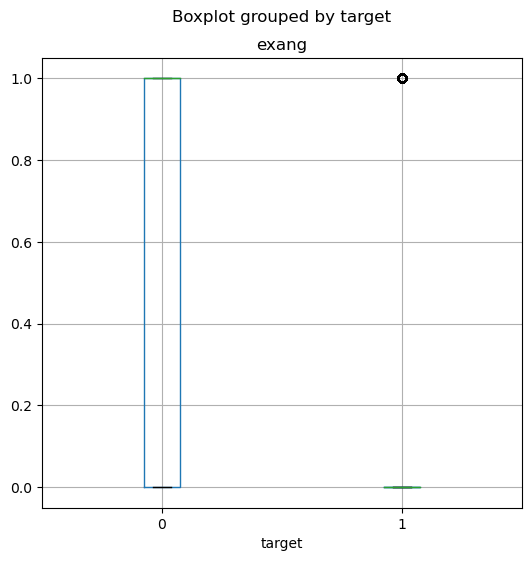

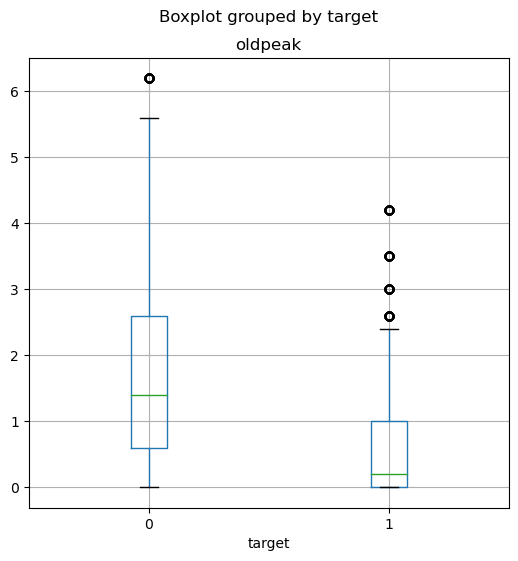

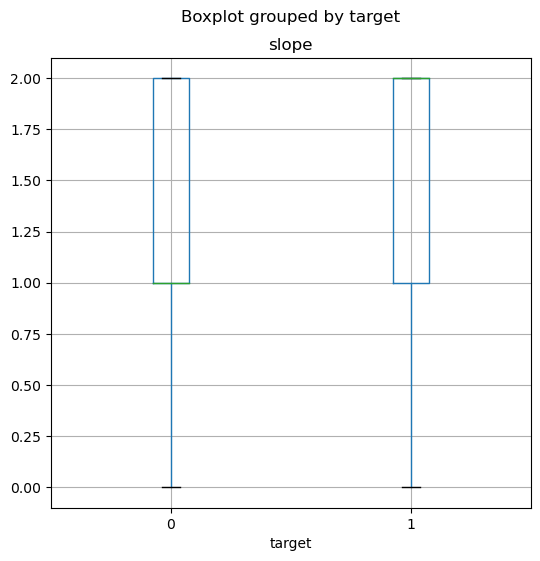

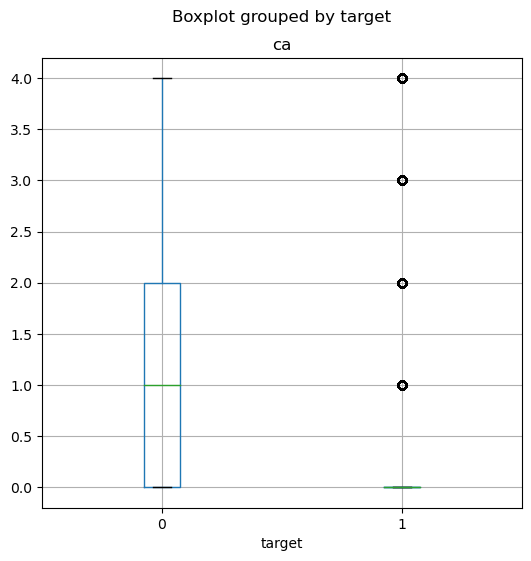

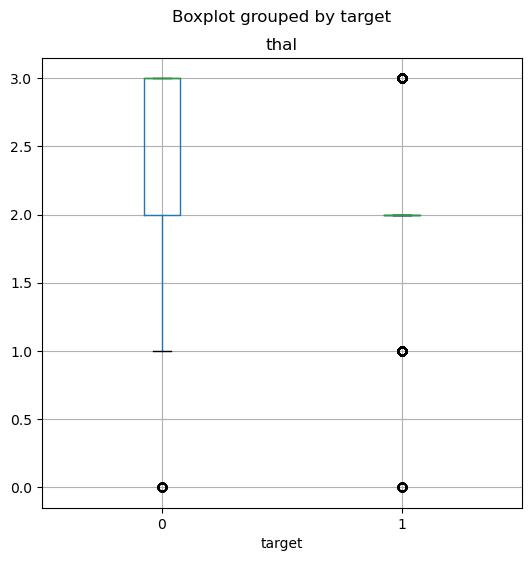

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['age','sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
for col in features:
    hypertension.boxplot(column=col, by='target', figsize=(6,6))
    plt.title(col)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 18258
Test cases: 7825


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

In [10]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Multinomial Naive Bayes": MultinomialNB()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 

    print(list(models.keys())[i])

    print('Model performance for Training set (Hypertension)')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set (Hypertension)')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set (Hypertension)
- Accuracy: 0.8202
- F1 score: 0.819127
- Precision: 0.821300
- Recall: 0.820243
----------------------------------
Model performance for Test set (Hypertension)
- Accuracy: 0.8121
- Fl score: 0.8108
- Precision: 0.8133
- Recall: 0.8121


Decision Tree
Model performance for Training set (Hypertension)
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set (Hypertension)
- Accuracy: 1.0000
- Fl score: 1.0000
- Precision: 1.0000
- Recall: 1.0000


Random Forest
Model performance for Training set (Hypertension)
- Accuracy: 1.0000
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set (Hypertension)
- Accuracy: 1.0000
- Fl score: 1.0000
- Precision: 1.0000
- Recall: 1.0000


K-Nearest Neighbors
Model performance for Training set (Hypertension)
- Accuracy: 0.

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

Confusion Matrix:
 [[3533    0]
 [   0 4292]] 

Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0

AUC: 1.0


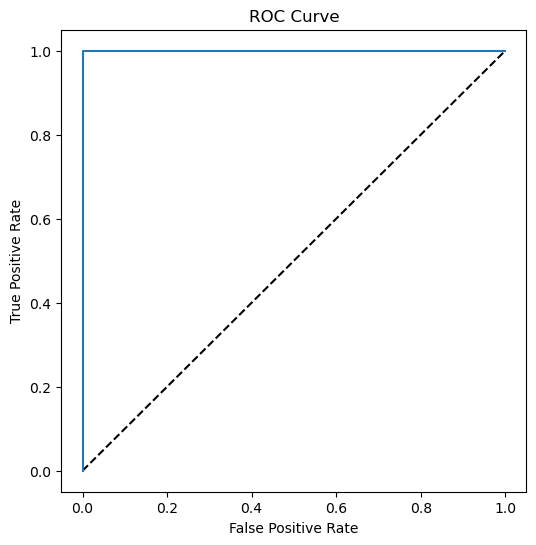

In [13]:
predictions = models['Decision Tree'].predict(X_test)
y_scores = models['Decision Tree'].predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [15]:
import joblib

# Save the model as a pickle file
model = models['Decision Tree']
hp_model = './models/hypertension_model.pkl'
joblib.dump(model, hp_model)

['./models/hypertension_model.pkl']